In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

## Load the results for all of the OPs

In [117]:
data_str = 'NQ' # NQ, ELI3G, 2WikiMH, MASH

n_samples = 0
og_op_results_fp = ''
post_hoc_results_fp = ''
figure_save_fp = ''
ct_thresholds = ['1','2','3','4','5','6','7','8','9']

if (data_str == 'MASH'):
    n_samples = 180
    og_op_results_fp = '../mturk_results/posthoc_mash_calibration_600_240_needs_citation_labels.jsonl'
    post_hoc_results_fp = '../generation_results/calibration_results/post_hoc_calibration_mash_30words_600_240_CT.{}.jsonl'
    figure_save_fp = '../visualize_results/figures/Citation_Threshold_Calibration_MASH.png'
    ct_thresholds = ['1','2','25', '3','4','5','6','7','8','9']
elif (data_str == '2WikiMH'):
    n_samples = 90
    og_op_results_fp = '../mturk_results/posthoc_mh_calibration_220_240_needs_citation_labels.jsonl'
    post_hoc_results_fp = '../generation_results/calibration_results/post_hoc_calibration_multihop_words_220_240_CT.{}.jsonl'
    ct_thresholds = ['025', '05', '1','2','3','4','5','6','7','8','9']
    figure_save_fp = '../visualize_results/figures/Citation_Threshold_Calibration_2WikiMH.png'
elif (data_str == 'NQ'):
    n_samples = 225
    og_op_results_fp = '../mturk_results/posthoc_nq_calibration_100_n140_needs_citation_labels_more.jsonl'
    post_hoc_results_fp = '../generation_results/calibration_results/post_hoc_calibration_nq_30words_100_140_CT.{}.jsonl'
    figure_save_fp = '../visualize_results/figures/Citation_Threshold_Calibration_NQ.png'
elif (data_str == 'ELI3G'):
    n_samples = 225
    og_op_results_fp = '../mturk_results/posthoc_eli3_calibration_0_240_needs_citation_labels.jsonl'
    post_hoc_results_fp = '../generation_results/calibration_results/post_hoc_calibration_eli3nq_30words_0_240_CT.{}.jsonl'
    ct_thresholds = ['1','2','25', '3','4','5','6','7','8','9']
    figure_save_fp = '../visualize_results/figures/Citation_Threshold_Calibration_ELI3G.png'
else:
    print('dataset not implemented')

og_op_results = pd.read_csv(og_op_results_fp, index_col=False)
og_op_results = og_op_results.iloc[0:n_samples]
# print(len(og_op_results))
og_op_results.columns

Index(['Unnamed: 0', 'ID', 'All Sources', 'All URLs', 'All Sources (cited)',
       'Used Sources (cited)', 'Question', 'Snippet Output (cited)',
       'Quoted Output (cited)', 'Paraphrased Output (cited)',
       'Entailed Output (cited)', 'Abstractive Output (cited)',
       'Snippet Output', 'Quoted Output', 'Paraphrased Output',
       'Entailed Output', 'Abstractive Output', 'Quoted Sent (cited)',
       'Paraphrased Sent (cited)', 'Entailed Sent (cited)',
       'Abstractive Sent (cited)', 'Quoted Sent', 'Paraphrased Sent',
       'Entailed Sent', 'Abstractive Sent', 'Quoted Citation Dict',
       'Paraphrased Citation Dict', 'Entailed Citation Dict',
       'Abstractive Citation Dict', 'Quoted Citation Count',
       'Paraphrased Citation Count', 'Entailed Citation Count',
       'Abstractive Citation Count', 'Snippet Fluency Rating',
       'Snippet Perceived Utility Rating', 'Snippet n-gram precision',
       'Quoted Fluency Rating', 'Quoted Perceived Utility Rating',
       

In [118]:
corrob_only_op_results_by_ct = []
for ct_threshold in ct_thresholds:
    filename = post_hoc_results_fp.format(ct_threshold)
    with open(filename, "r") as f:
        results = [json.loads(line) for line in f]
        df = pd.DataFrame(results)
    print(len(df.iloc[0:n_samples]['ID']))
    corrob_only_op_results_by_ct.append(df.iloc[0:180])
corrob_only_op_results_by_ct[0].columns

225
225
225
225
225
225
225
225
225


Index(['ID', 'All Sources', 'All URLs', 'All Sources (cited)',
       'Used Sources (cited)', 'Question', 'Post Hoc Cited Output (cited)',
       'Post Hoc Cited Output', 'Post Hoc Cited Sent (cited)',
       'Post Hoc Cited Sent', 'Post Hoc Cited Citation Dict',
       'Sentences Need Citation', 'Max Tokens', 'Temperature'],
      dtype='object')

## Function to count
Count the avg number of citations per sentence for a df of results

In [119]:
def get_sent_citation_counts(df, op=None):
    total_num_citations = 0
    total_num_sentences = 0
    num_citations_by_sent = []
    op_str = ''
    if (op):
        op_str = op+' '
    for i in range(len(df)):
        if (op_str+'Citation Dict' in df.columns):
            citation_dict = eval(df[op_str+'Citation Dict'].iloc[i])
            sentences_need_citation = eval(df['Entailed Sentences Need Citation'].iloc[i]) 
        else:
            citation_dict = df['Post Hoc Cited Citation Dict'].iloc[i]
            sentences_need_citation = df['Sentences Need Citation'].iloc[i] 
        for k in citation_dict.keys():
            if ((i==92) and (data_str=='MASH')):
                sentences_need_citation = [True]*4
            if (sentences_need_citation[int(k)] == False): 
                continue
            total_num_sentences += 1
            total_num_citations += len(citation_dict[k]['citation_numbers'])
            num_citations_by_sent.append(len(citation_dict[k]['citation_numbers']))
    
    return num_citations_by_sent

def calculate_stats(num_citations_by_sent):
    return np.sum(num_citations_by_sent), len(num_citations_by_sent), np.sum(num_citations_by_sent)/len(num_citations_by_sent)

In [120]:
calculate_stats(get_sent_citation_counts(og_op_results, 'Entailed'))

(387, 274, 1.4124087591240877)

In [121]:
num_per_sentence = []
for df in corrob_only_op_results_by_ct:
    a,b,c = calculate_stats(get_sent_citation_counts(df))
    num_per_sentence.append(c)
num_per_sentence

[2.9240506329113924,
 2.305084745762712,
 1.8940677966101696,
 1.5847457627118644,
 1.3855932203389831,
 1.2669491525423728,
 1.1101694915254237,
 0.902542372881356,
 0.7457627118644068]

# Get CIs and plot to choose the citation threshold

In [122]:
def get_half_ci(relevant_col):
    return 1.96*np.std(relevant_col, ddof=1) / np.sqrt(len(relevant_col))

In [123]:
num_citations_by_sent = get_sent_citation_counts(og_op_results, 'Entailed')
get_half_ci(num_citations_by_sent)

0.0913249726608053

In [124]:
cis = []
for df in corrob_only_op_results_by_ct:
    num_citations_by_sent = get_sent_citation_counts(df)
    cis.append(get_half_ci(num_citations_by_sent))
cis

[0.34873068514299016,
 0.3180150023487494,
 0.2971055668210105,
 0.27744876082922254,
 0.26422702494718237,
 0.2543793969944519,
 0.2379102770886094,
 0.20968646231037133,
 0.19460717652758483]

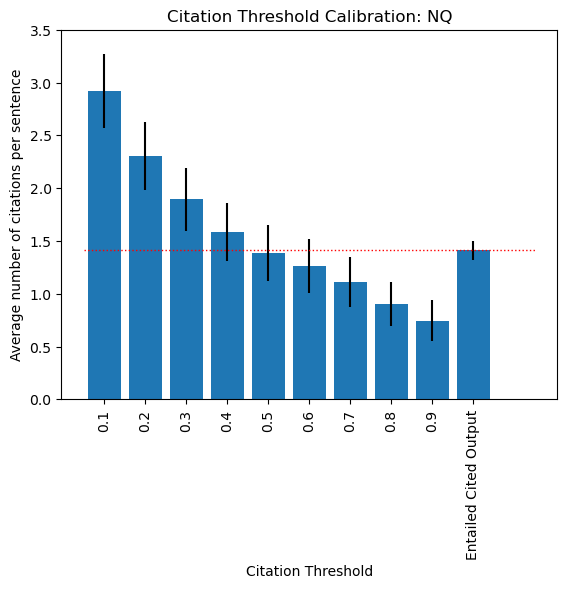

In [127]:
ct_thresholds_labels = ['0.'+x for x in ct_thresholds]
ct_thresholds_labels_plotting = ct_thresholds_labels+['Entailed Cited Output']
num_per_sentence_plotting = num_per_sentence+[calculate_stats(get_sent_citation_counts(og_op_results, 'Entailed'))[2]]
cis_plotting = cis+ [get_half_ci(get_sent_citation_counts(og_op_results, 'Entailed'))]
plt.bar(ct_thresholds_labels_plotting, num_per_sentence_plotting, yerr=cis_plotting)
plt.ylabel('Average number of citations per sentence')
plt.xlabel('Citation Threshold')
plt.hlines(y=num_per_sentence_plotting[-1], xmin=-.5, xmax=10.5, linewidth=1, color='r', linestyles='dotted')
plt.xticks(rotation=90)
plt.ylim(0,3.5) 
# NQ: 3.5 
# ELI3G: 2.3
# 2WikiMH: 4.3
# MASH: 4
if (data_str=='ELI3G'):
    data_str = 'Eta3G'
plt.title('Citation Threshold Calibration: '+data_str)
plt.savefig(figure_save_fp, bbox_inches='tight')
plt.show();

# Get average number of words per response

In [128]:
avg_word_count = np.mean(og_op_results['Entailed Output'].str.split(' ').dropna().apply(len))
ci_word_count = get_half_ci(og_op_results['Entailed Output'].str.split(' ').dropna().apply(len))
avg_word_count, ci_word_count

(30.060606060606062, 2.83841375416393)

In [129]:
avg_word_count = np.mean(corrob_only_op_results_by_ct[0]['Post Hoc Cited Output'].str.split(' ').dropna().apply(len))
ci_word_count = get_half_ci(corrob_only_op_results_by_ct[0]['Post Hoc Cited Output'].str.split(' ').dropna().apply(len))
avg_word_count, ci_word_count

(29.477777777777778, 0.46773602288316307)